In [1]:
#Inicialmente foi importado o pacote que será utilizado ao longo do programa.

import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Em seguida, é importada a planilha com as informações referentes aos jogos do campeonato brasileiro (2021 e 2022)

partidas22 = pd.read_excel('e:/Desktop/Python/ECaso2/jogos_br.xlsx')


A base de dados com as informacoes dos jogos foi extraida do site API-Football e salva em uma planilha excel.

A seguir, são realizados os comandos para importacao da planilha para este notebook, e tambem, são feitos alguns tratamentos nos campos da base a fim de facilitar a sua manipulação, que são eles:

- Foi criado um campo com o resultado da partida para o time da casa e o visitante, isto e, se venceram ou perderam. A base ja possuia um campo informando o resultado, porem os valores estavam apenas como falso ou verdadeiro, e ao ser importado para o notebook vem com os valores 0 ou 1, com isso, eles foram substituidos pelas letras D(Derrota) e V(Vitoria), com o objetivo de facilitar a visualizacao, alem de incluir a letra E para empate, pois nesta condicao o campo de resultado ficava em branco.

- Por fim, foram excluidas as colunas casa_vence e fora_vence devido aos tratamentos realizados conforme o item anterior.


In [3]:
partidas22['result_casa']= partidas22.casa_vence.replace({0.0:'D',1.0:'V'}).fillna('E')
partidas22['result_visit']= partidas22.visitante_vence.replace({0.0:'D',1.0:'V'}).fillna('E')
partidas22.drop(columns=['casa_vence','visitante_vence'], inplace = True)

In [4]:
#Agora com os devidos tratamentos, podemos seguir com os respectivos cálculos para proseguimento da análise.
#Logo, são calculados o total de gols de cada partida bem como a diferença de gols por partida.

partidas22['dif_gols'] = abs(partidas22['gols_casa']-partidas22['gols_visitante'])
partidas22['total_gols'] = partidas22['gols_casa']+partidas22['gols_visitante']
partidas22.head()

,partida_id,status,id_liga,liga_nome,liga_pais,temporada,rodada,casa_id,casa_nome,visitante_id,visitante_nome,gols_casa,gols_visitante,dif,result_casa,result_visit,dif_gols,total_gols
0,837991,Match Finished,71,Serie A,Brazil,2022,Regular Season - 1,1062,Atletico-MG,119,Internacional,2,0,2,V,D,2,2
1,837992,Match Finished,71,Serie A,Brazil,2022,Regular Season - 1,124,Fluminense,128,Santos,0,0,0,E,E,0,0
2,837993,Match Finished,71,Serie A,Brazil,2022,Regular Season - 1,126,Sao Paulo,134,Atletico Paranaense,4,0,4,V,D,4,4
3,837994,Match Finished,71,Serie A,Brazil,2022,Regular Season - 1,121,Palmeiras,129,Ceara,2,3,-1,D,V,1,5
4,837995,Match Finished,71,Serie A,Brazil,2022,Regular Season - 1,120,Botafogo,131,Corinthians,1,3,-2,D,V,2,4


In [5]:
#Agora será feito o levatamento da quantidade de partidas cada categoria de diferença de gols teve ao longo do campeonato

dif_gols22 = partidas22.groupby('dif_gols')['partida_id'].count().sort_values(ascending = False)


#Aqui, o levantamento anterior será convertido em DataFrame para criação do gráfico com os respectivos valores

Diferencas22 = pd.DataFrame(dif_gols22)

#Conversão das colunas de índice dos DataFrames em listas, pois assim conseguimos atribuir adequadamente estes valores como
#parametro no comando para plotagem do gráfico de barras.

Gols22 = Diferencas22.index.tolist()

#Conversão das colunas de valores dos DataFrames em listas, pelo mesmo motivo do passo anterior.
Qtde_Partidas22 = Diferencas22['partida_id'].tolist()



In [21]:
Qtde_Partidas22

[171, 108, 58, 29, 12, 1, 1]

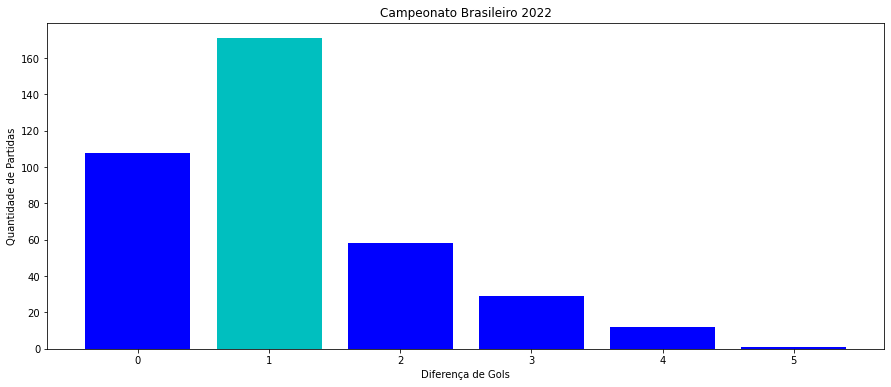

In [22]:
#Passos para construção do gráfico

#Esta função é usada para criar a figura onde será plotado o gráfico
plt.figure(figsize=(15, 6))

#Função para criação do gráfico de barras dos valores levantados anteriormente.
#Visto que a ideia é destacar a quantidade de partida com diferenças de um gol, executei os comandos para plotar separadamente 
#a barra referente a essas partida com o objetivo de configurar separadamentea cor desta barra.

plt.bar(Gols22[0],Qtde_Partidas22[0], color='c')
plt.bar(Gols22[1:6],Qtde_Partidas22[1:6], color='b')


plt.xlabel("Diferença de Gols")
plt.ylabel("Quantidade de Partidas")
plt.title("Campeonato Brasileiro 2022")


plt.show()

In [15]:
#Calculo da proporção amostral de partidas vencidas por um gol de diferenca.

total_jgs = len(partidas22.index)
vit_1gol = len(partidas22['partida_id'].loc[(partidas22.dif_gols==1)])

pr = vit_1gol/total_jgs
pr

0.45

In [16]:
#Intervalo de proporcao de jogos vencidos por diferenca de 1 gol

sm.stats.proportion_confint(total_jgs * pr, total_jgs, alpha = 0.01)

(0.384262545548444, 0.515737454451556)